In [5]:
from astropy.cosmology import Planck13
import pandas as pd
import numpy as np
import disperse
from tqdm import tqdm
import json
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
with open('metrics_02.json') as f:
    metrics = json.load(f)

In [24]:
metrics

{'mode': 'MPC',
 'COEFS': [1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0],
 'min_n_gals': 15,
 'total_clusters': 222,
 '3.0': {'0': {'true': [168,
    201,
    214,
    219,
    220,
    221,
    222,
    222,
    222,
    222,
    222,
    222,
    222,
    222,
    222,
    222,
    222,
    222,
    222],
   'false': [1.6,
    6.8,
    12.2,
    23.2,
    36.8,
    47.8,
    58.6,
    67.8,
    79.0,
    91.0,
    97.8,
    103.8,
    111.6,
    116.4,
    120.8,
    125.2,
    129.4,
    132.0,
    136.0],
   'diff': [166.4,
    194.2,
    201.8,
    195.8,
    183.2,
    173.2,
    163.4,
    154.2,
    143.0,
    131.0,
    124.2,
    118.2,
    110.4,
    105.6,
    101.2,
    96.8,
    92.6,
    90.0,
    86.0],
   'fils_num': 2949,
   'true_fils_inter': [292,
    457,
    591,
    697,
    799,
    930,
    1036,
    1146,
    1251,
    1349,
    1436,
    1544,
    1653,
    1746,
  

In [25]:
for SIGMA in [3.0, 4.0, 5.0]:
    for SMOOTH in [0, 1, 2]:
        recall = []
        recall_false = []
        recall_diff = []
        prec = []
        prec_false = []
        prec_diff = []
        f1 = []
        f1_diff = []
        for e in metrics[str(SIGMA)][str(SMOOTH)]['true']:
            recall.append(e / metrics['total_clusters'])
        for e in metrics[str(SIGMA)][str(SMOOTH)]['false']:
            recall_false.append(e / metrics['total_clusters'])
        for e in metrics[str(SIGMA)][str(SMOOTH)]['diff']:
            recall_diff.append(e / metrics['total_clusters'])
        for e in metrics[str(SIGMA)][str(SMOOTH)]['true_fils_inter']:
            prec.append(e / metrics[str(SIGMA)][str(SMOOTH)]['fils_num'])
        for e in metrics[str(SIGMA)][str(SMOOTH)]['false_fils_inter']:
            prec_false.append(e / metrics[str(SIGMA)][str(SMOOTH)]['fils_num'])
        for e in metrics[str(SIGMA)][str(SMOOTH)]['fils_diff']:
            prec_diff.append(e / metrics[str(SIGMA)][str(SMOOTH)]['fils_num'])
        for i in range(len(recall)):
            f1.append(2 * recall[i] * prec[i] / (recall[i] + prec[i]))
        for i in range(len(recall_diff)):
            f1_diff.append(2 * recall_diff[i] * prec_diff[i] / (recall_diff[i] + prec_diff[i]))
        metrics[str(SIGMA)][str(SMOOTH)]['recall'] = recall
        metrics[str(SIGMA)][str(SMOOTH)]['prec'] = prec
        metrics[str(SIGMA)][str(SMOOTH)]['f1'] = f1
        metrics[str(SIGMA)][str(SMOOTH)]['recall_false'] = recall_false
        metrics[str(SIGMA)][str(SMOOTH)]['recall_diff'] = recall_diff
        metrics[str(SIGMA)][str(SMOOTH)]['prec_false'] = prec_false
        metrics[str(SIGMA)][str(SMOOTH)]['prec_diff'] = prec_diff
        metrics[str(SIGMA)][str(SMOOTH)]['f1_diff'] = f1_diff

In [26]:
metrics

{'mode': 'MPC',
 'COEFS': [1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0],
 'min_n_gals': 15,
 'total_clusters': 222,
 '3.0': {'0': {'true': [168,
    201,
    214,
    219,
    220,
    221,
    222,
    222,
    222,
    222,
    222,
    222,
    222,
    222,
    222,
    222,
    222,
    222,
    222],
   'false': [1.6,
    6.8,
    12.2,
    23.2,
    36.8,
    47.8,
    58.6,
    67.8,
    79.0,
    91.0,
    97.8,
    103.8,
    111.6,
    116.4,
    120.8,
    125.2,
    129.4,
    132.0,
    136.0],
   'diff': [166.4,
    194.2,
    201.8,
    195.8,
    183.2,
    173.2,
    163.4,
    154.2,
    143.0,
    131.0,
    124.2,
    118.2,
    110.4,
    105.6,
    101.2,
    96.8,
    92.6,
    90.0,
    86.0],
   'fils_num': 2949,
   'true_fils_inter': [292,
    457,
    591,
    697,
    799,
    930,
    1036,
    1146,
    1251,
    1349,
    1436,
    1544,
    1653,
    1746,
  

In [31]:
for SIGMA in [3.0, 4.0, 5.0]:
    for SMOOTH in [0, 1, 2]:
        print(f'SIGMA={SIGMA}, SMOOTH={SMOOTH}, Recall_DIFF={metrics[str(SIGMA)][str(SMOOTH)]["recall_diff"][2]}, Prec_DIFF={metrics[str(SIGMA)][str(SMOOTH)]["prec_diff"][2]}, F1_DIFF={metrics[str(SIGMA)][str(SMOOTH)]["f1_diff"][2]}')

SIGMA=3.0, SMOOTH=0, Recall_DIFF=0.909009009009009, Prec_DIFF=0.19328585961342828, F1_DIFF=0.3187869102978432
SIGMA=3.0, SMOOTH=1, Recall_DIFF=0.8216216216216217, Prec_DIFF=0.293398533007335, F1_DIFF=0.4323914280295847
SIGMA=3.0, SMOOTH=2, Recall_DIFF=0.6972972972972974, Prec_DIFF=0.43506493506493504, F1_DIFF=0.5358172406311026
SIGMA=4.0, SMOOTH=0, Recall_DIFF=0.872972972972973, Prec_DIFF=0.22659846547314577, F1_DIFF=0.3598026088323118
SIGMA=4.0, SMOOTH=1, Recall_DIFF=0.7981981981981981, Prec_DIFF=0.34137291280148424, F1_DIFF=0.4782206942272886
SIGMA=4.0, SMOOTH=2, Recall_DIFF=0.6684684684684685, Prec_DIFF=0.4975369458128079, F1_DIFF=0.5704737835698191
SIGMA=5.0, SMOOTH=0, Recall_DIFF=0.8378378378378378, Prec_DIFF=0.29772727272727273, F1_DIFF=0.43933574944555637
SIGMA=5.0, SMOOTH=1, Recall_DIFF=0.7063063063063063, Prec_DIFF=0.4806201550387597, F1_DIFF=0.5720068723669656
SIGMA=5.0, SMOOTH=2, Recall_DIFF=0.5765765765765766, Prec_DIFF=0.5757575757575758, F1_DIFF=0.576166785122009


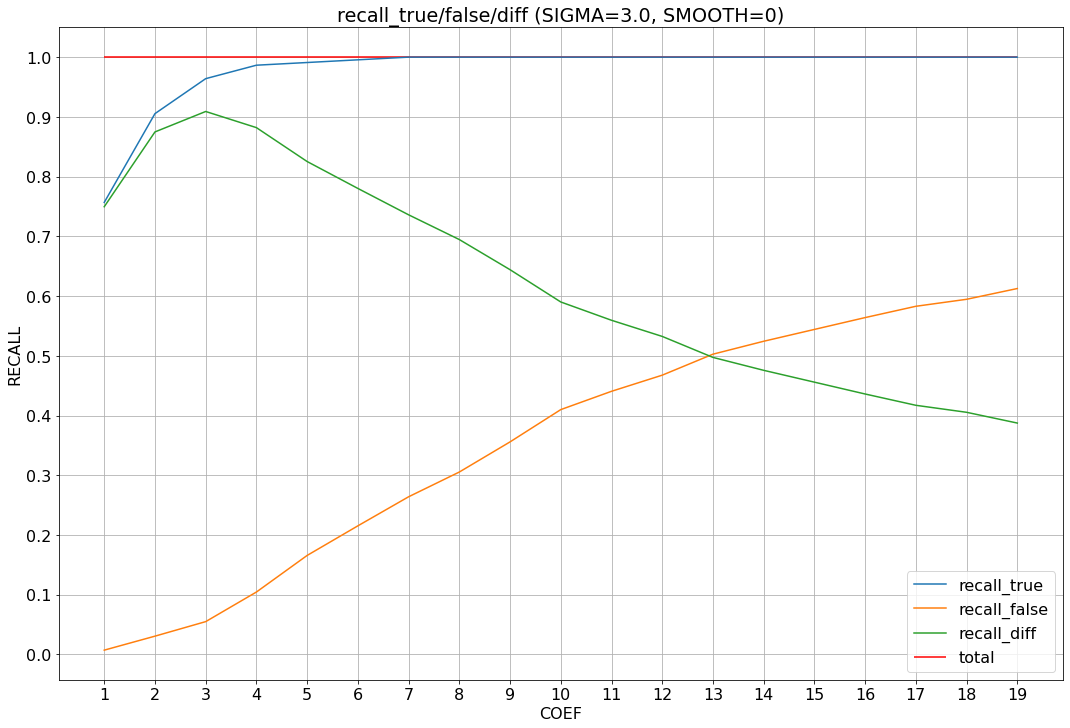

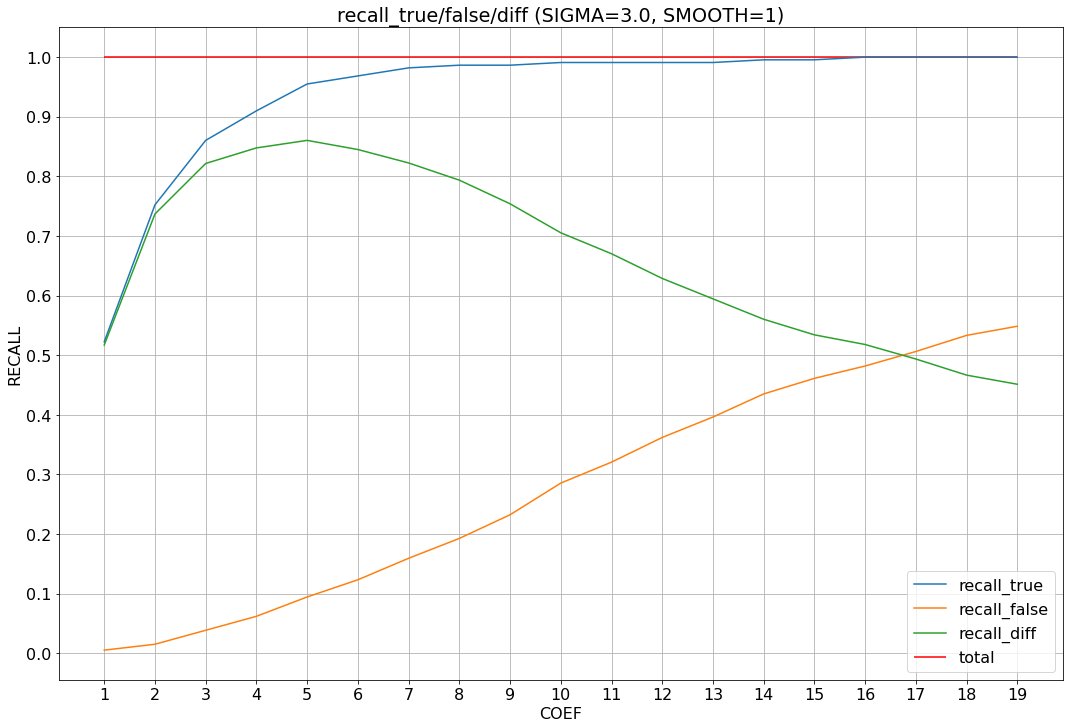

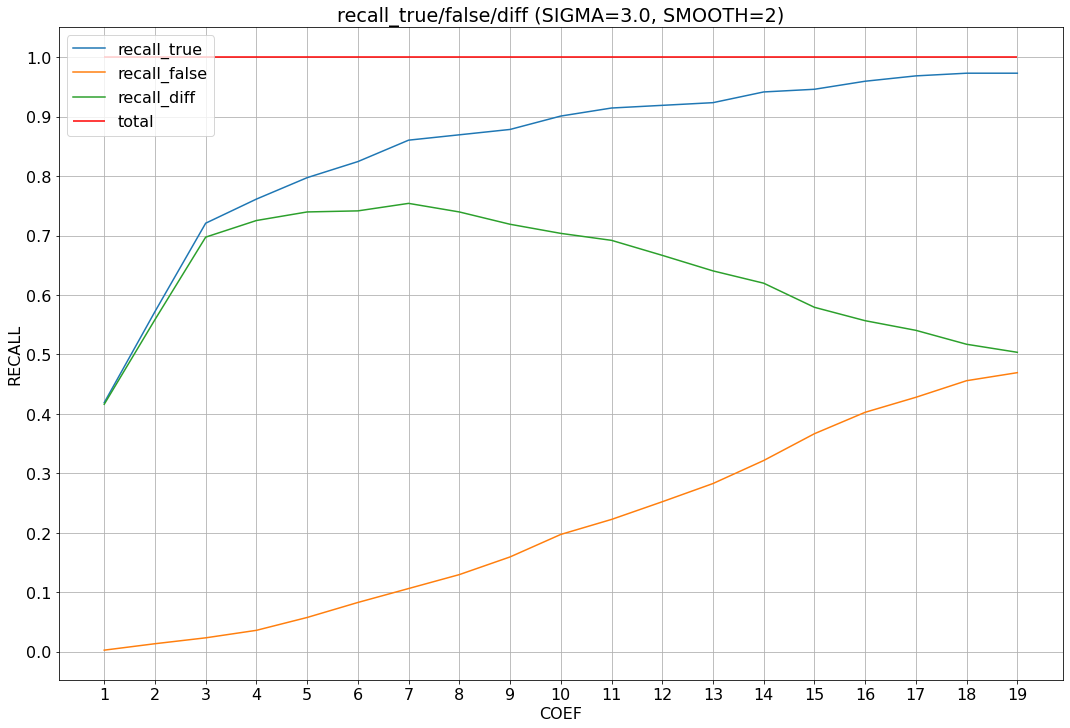

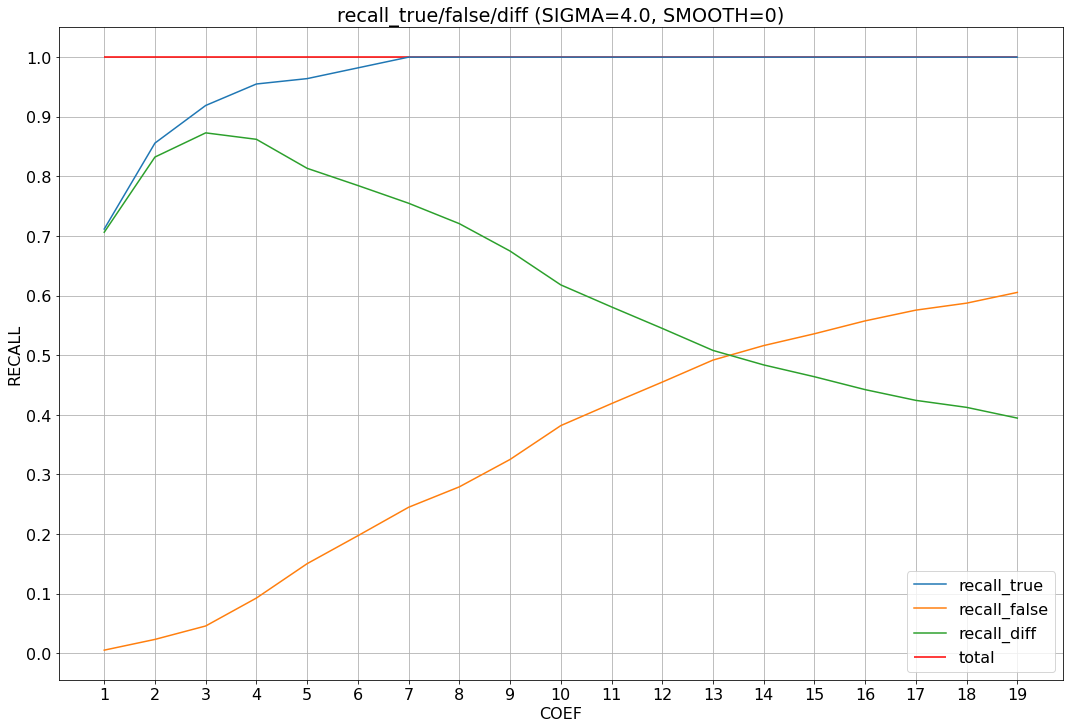

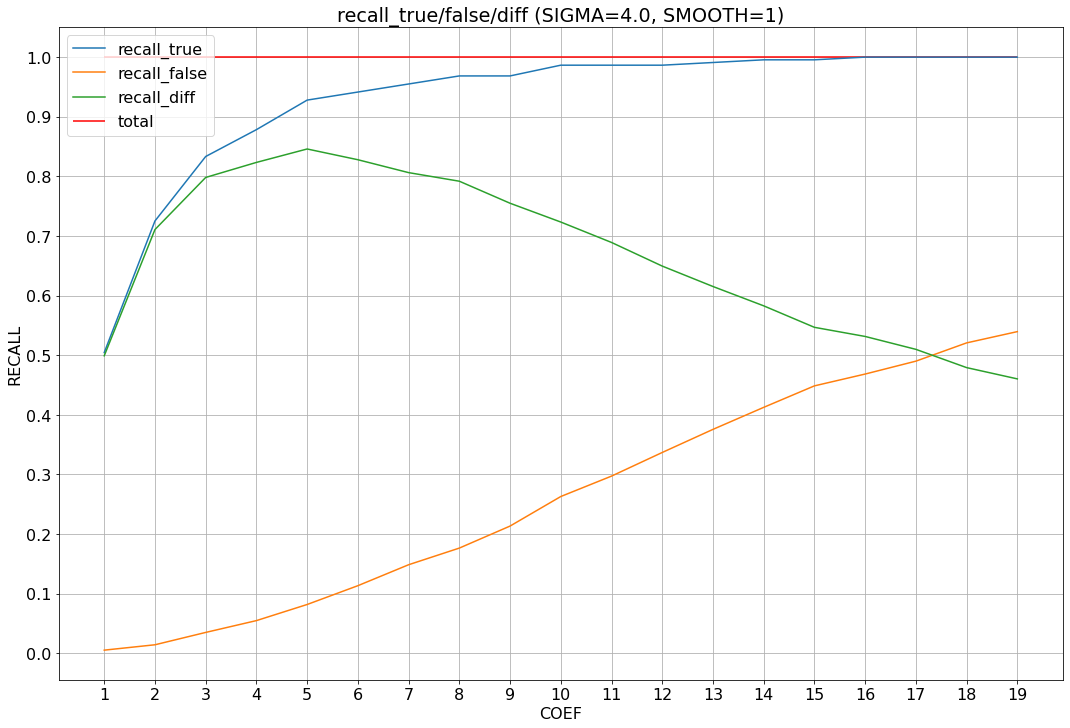

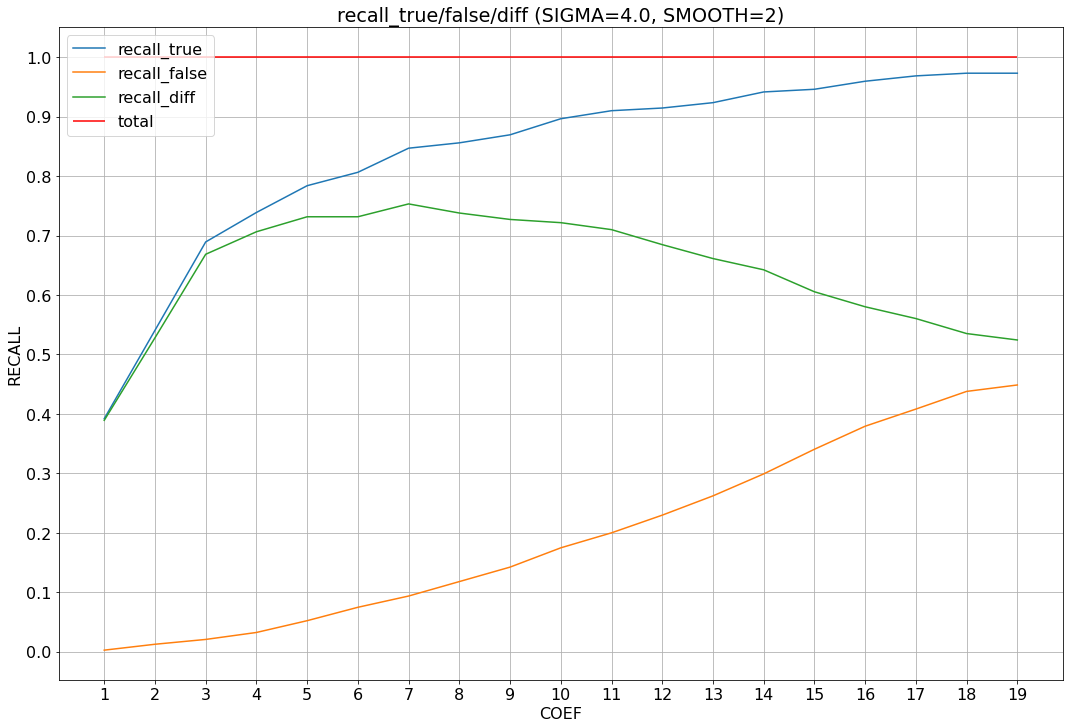

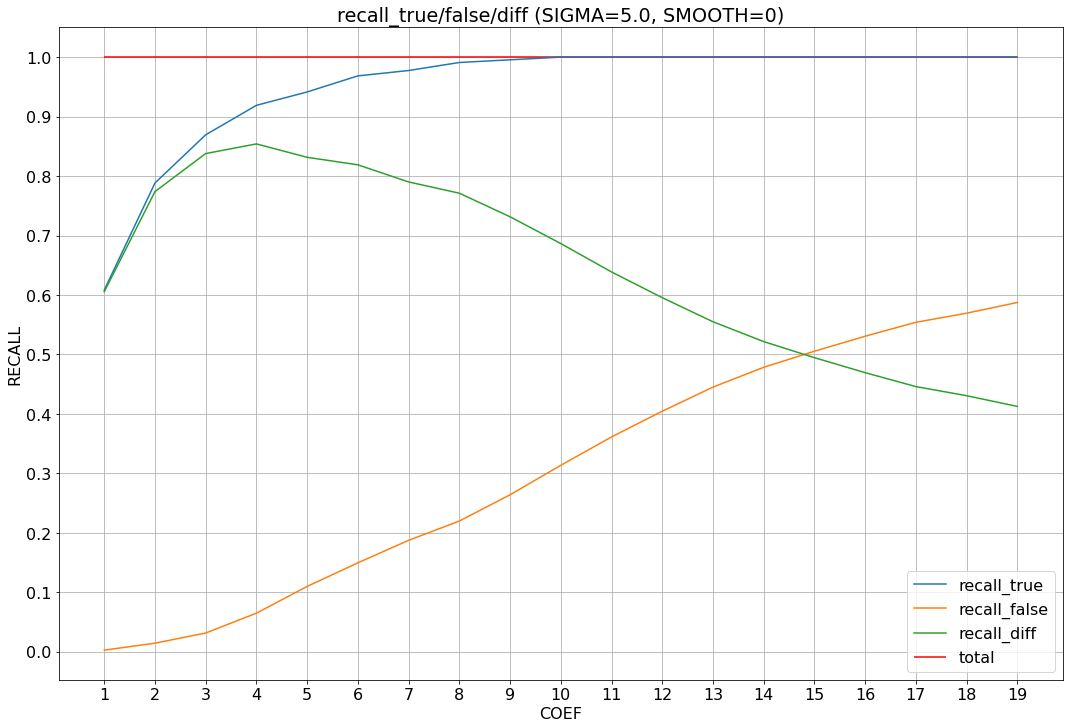

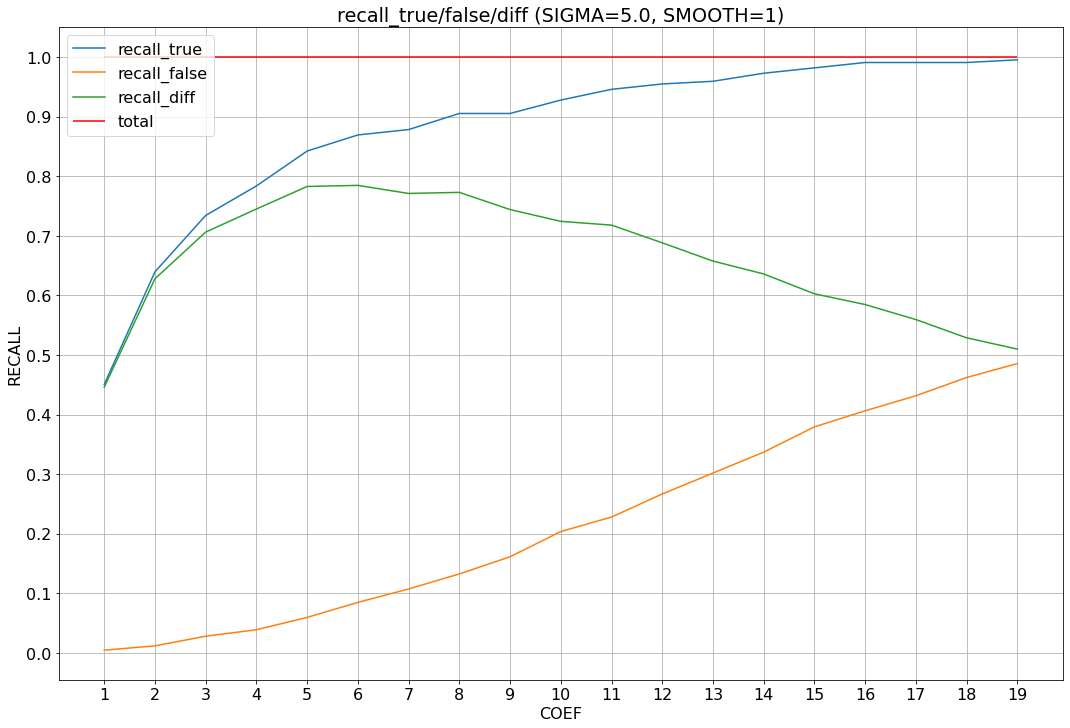

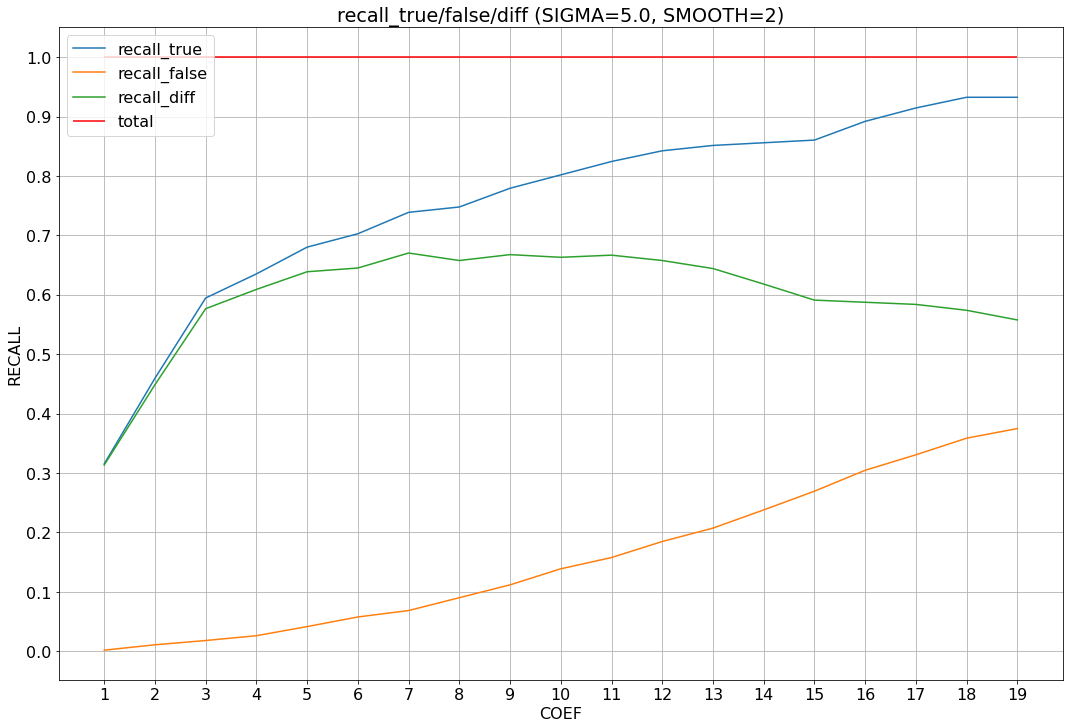

In [5]:
%matplotlib inline
for SIGMA in [3.0, 4.0, 5.0]:
    for SMOOTH in [0, 1, 2]:
        coefs = metrics['COEFS']
        true = metrics[str(SIGMA)][str(SMOOTH)]['recall']
        false = metrics[str(SIGMA)][str(SMOOTH)]['recall_false']
        diff = metrics[str(SIGMA)][str(SMOOTH)]['recall_diff']

        font = {'size': 16}
        plt.rc('font', **font)
        fig = plt.figure(figsize=(18, 12))

        plt.plot(coefs, true, label='recall_true')
        plt.plot(coefs, false, label='recall_false')
        plt.plot(coefs, diff, label='recall_diff')
        plt.hlines(1, min(coefs), max(coefs), color='r', label='total')
        plt.grid()

        plt.xticks(coefs)
        plt.yticks(np.arange(0.0, 1.1, 0.1))
        plt.xlabel('COEF')
        plt.ylabel('RECALL')
        plt.legend()
        plt.title(f'recall_true/false/diff (SIGMA={SIGMA}, SMOOTH={SMOOTH})')
        plt.savefig(f'recall_true_false_diff_SIGMA={SIGMA}_SMOOTH={SMOOTH}.jpg')

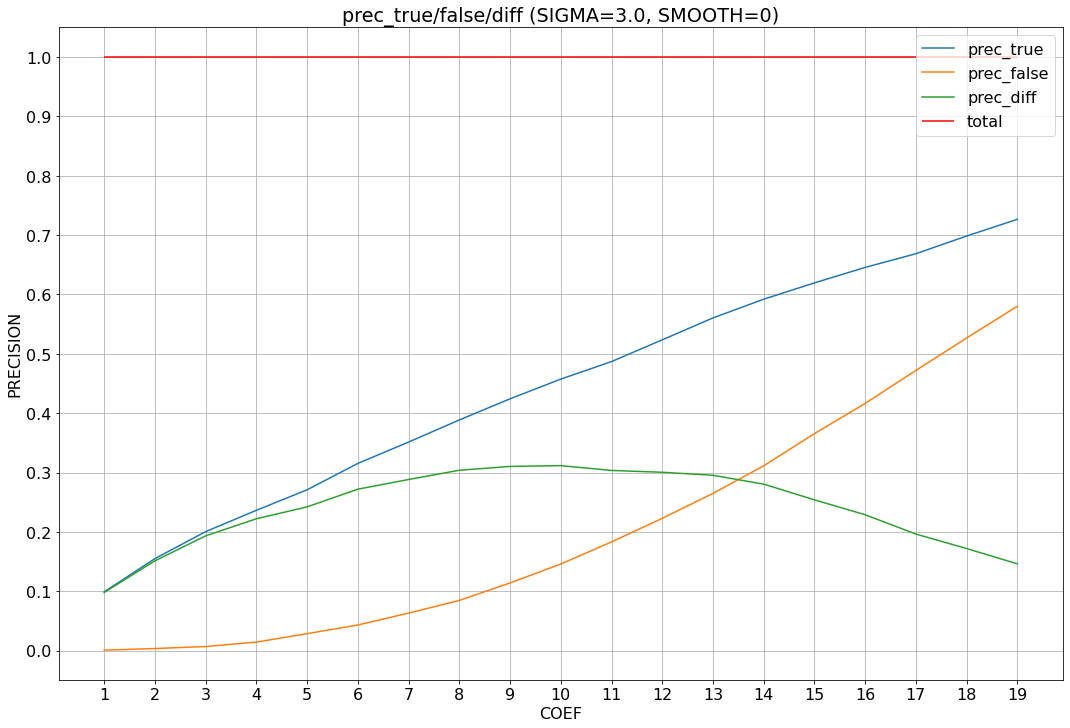

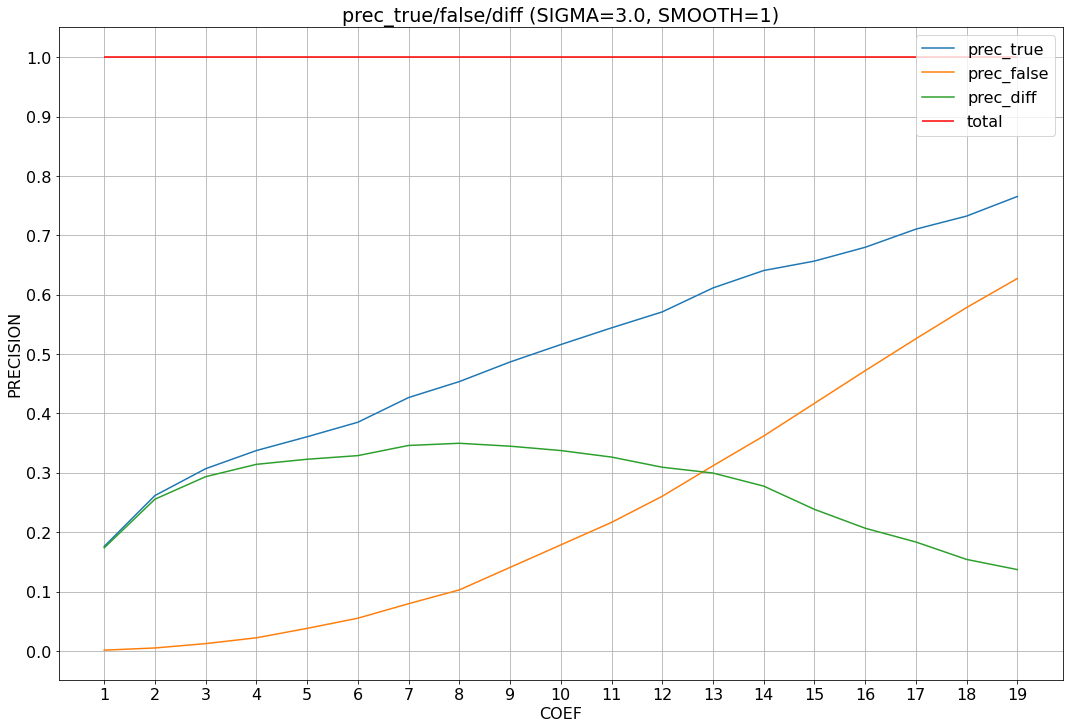

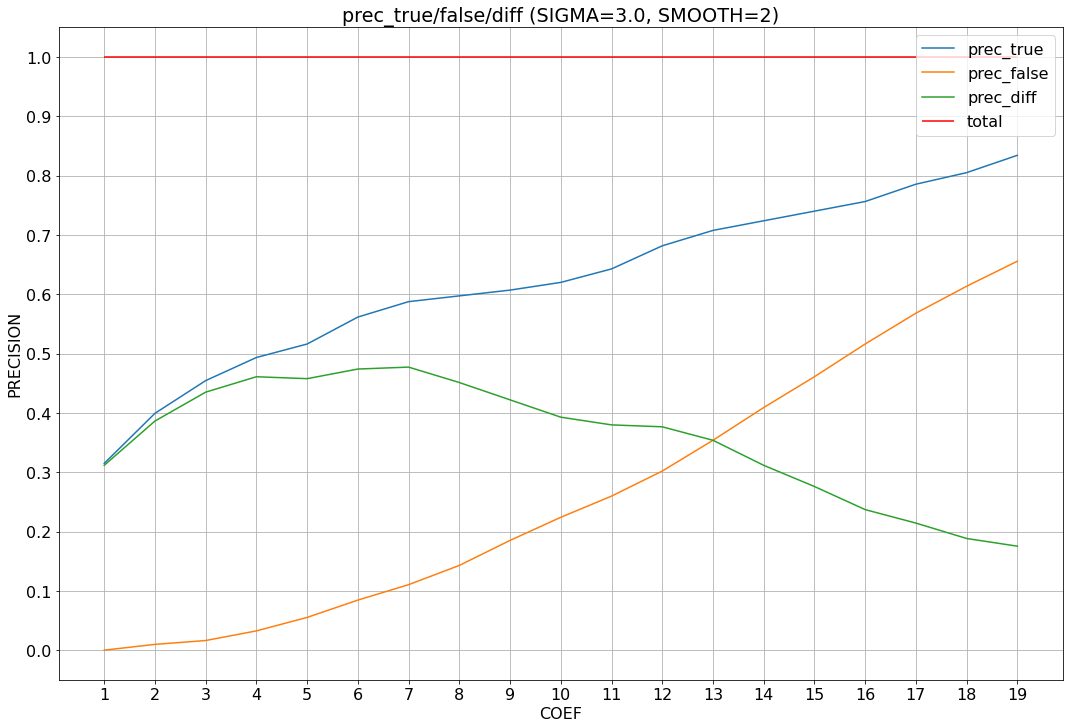

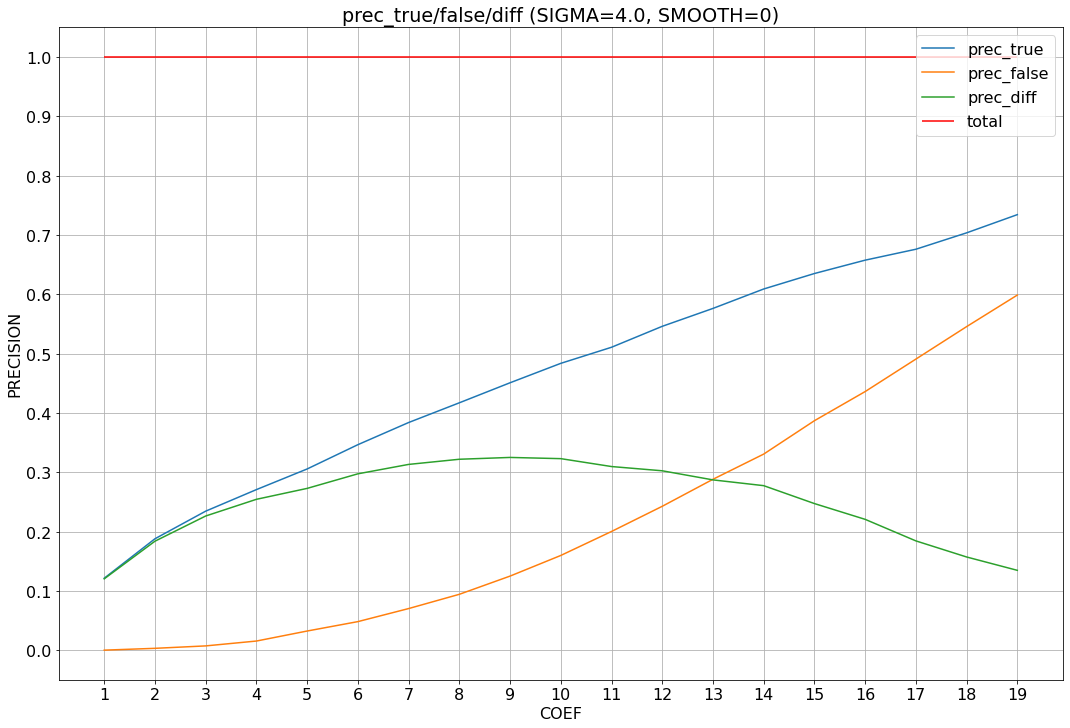

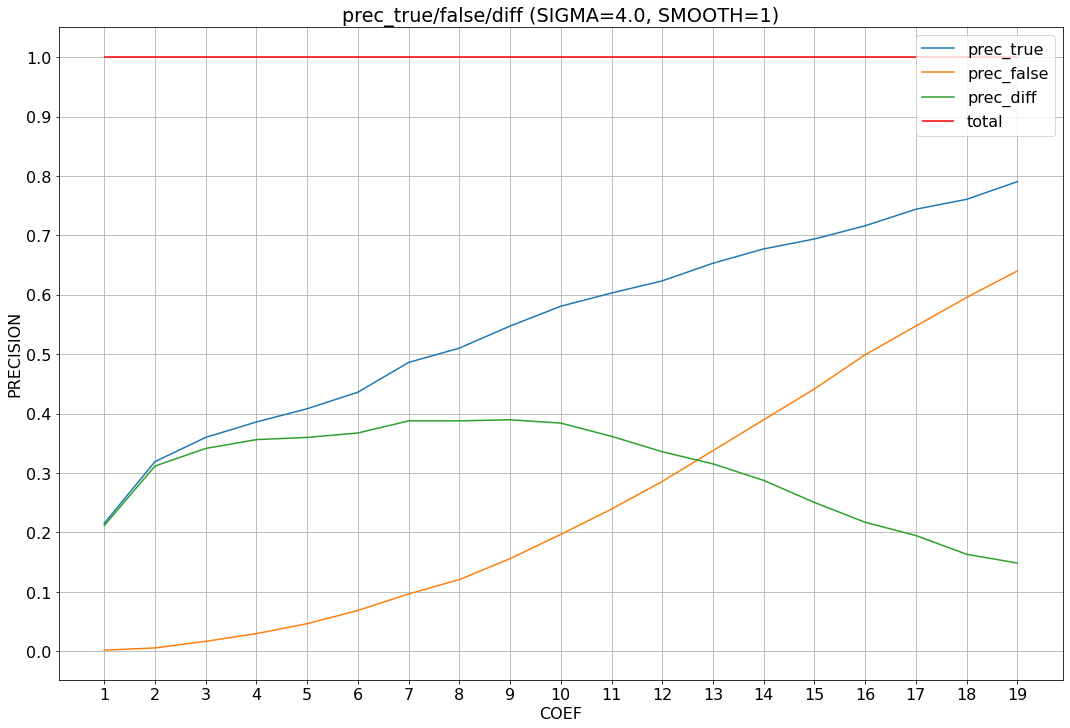

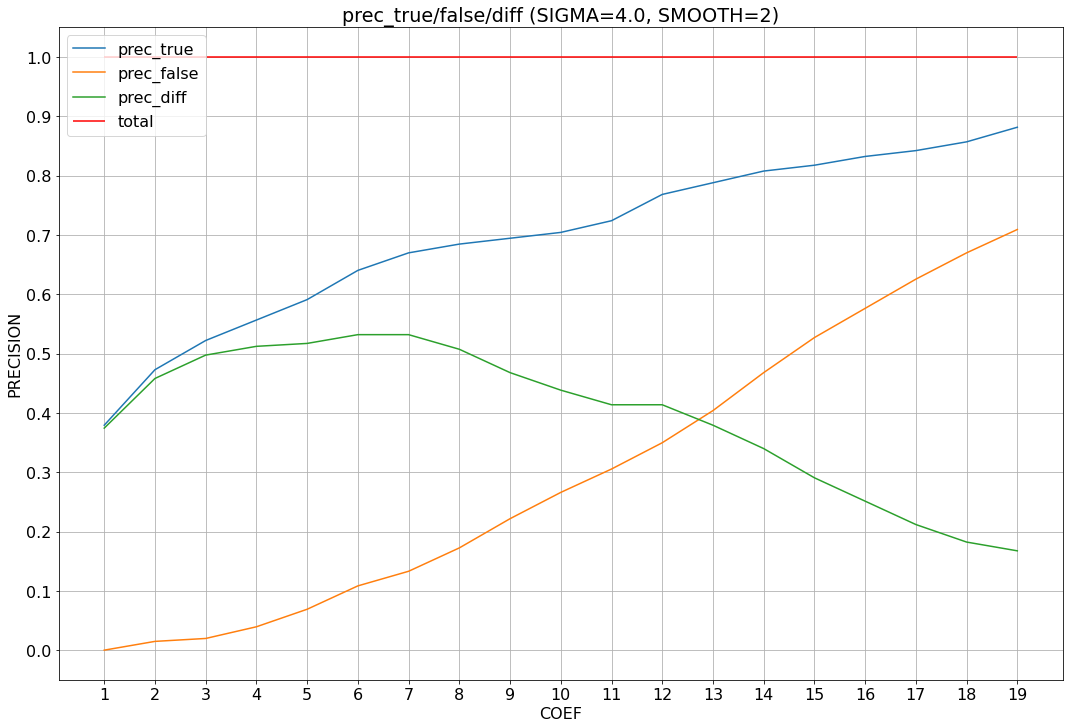

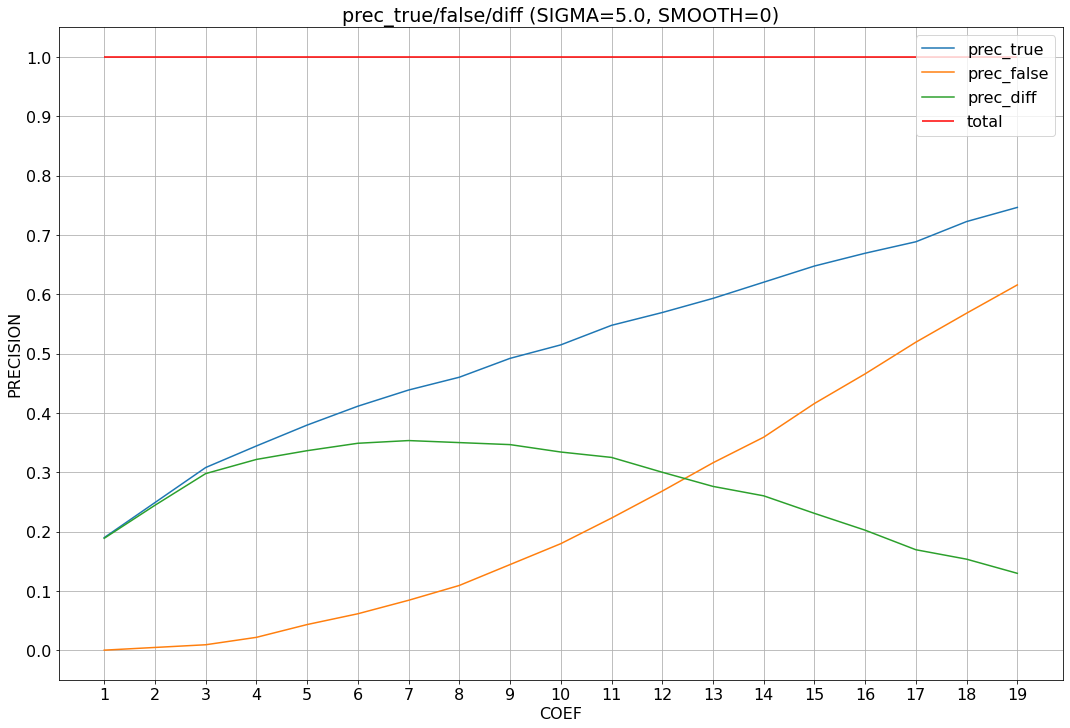

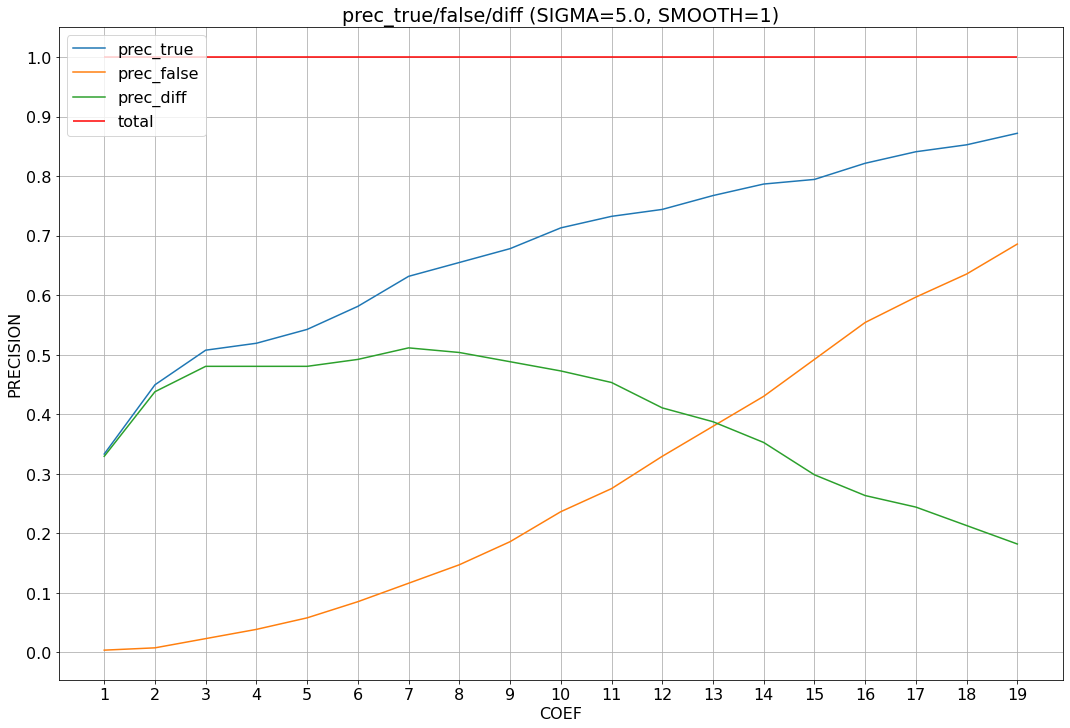

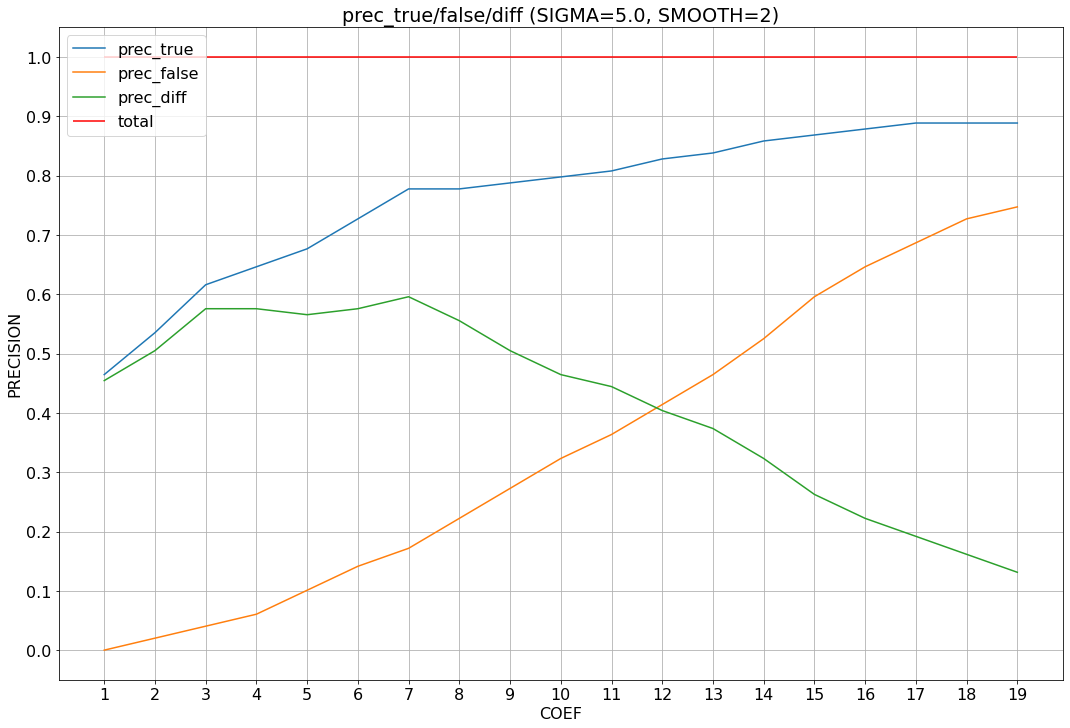

In [6]:
%matplotlib inline
for SIGMA in [3.0, 4.0, 5.0]:
    for SMOOTH in [0, 1, 2]:
        coefs = metrics['COEFS']
        true = metrics[str(SIGMA)][str(SMOOTH)]['prec']
        false = metrics[str(SIGMA)][str(SMOOTH)]['prec_false']
        diff = metrics[str(SIGMA)][str(SMOOTH)]['prec_diff']

        font = {'size': 16}
        plt.rc('font', **font)
        fig = plt.figure(figsize=(18, 12))

        plt.plot(coefs, true, label='prec_true')
        plt.plot(coefs, false, label='prec_false')
        plt.plot(coefs, diff, label='prec_diff')
        plt.hlines(1, min(coefs), max(coefs), color='r', label='total')
        plt.grid()

        plt.xticks(coefs)
        plt.yticks(np.arange(0.0, 1.1, 0.1))
        plt.xlabel('COEF')
        plt.ylabel('PRECISION')
        plt.legend()
        plt.title(f'prec_true/false/diff (SIGMA={SIGMA}, SMOOTH={SMOOTH})')
        plt.savefig(f'prec_true_false_diff_SIGMA={SIGMA}_SMOOTH={SMOOTH}.jpg')

In [7]:
# %matplotlib inline
# for SIGMA in [3.0, 4.0, 5.0]:
#     for SMOOTH in [0, 1, 2]:
#         coefs = metrics['COEFS']
#         true = metrics[str(SIGMA)][str(SMOOTH)]['true']
#         false = metrics[str(SIGMA)][str(SMOOTH)]['false']
#         diff = metrics[str(SIGMA)][str(SMOOTH)]['diff']

#         font = {'size': 16}
#         plt.rc('font', **font)
#         fig = plt.figure(figsize=(18, 12))

#         plt.plot(coefs, true, label='true')
#         plt.plot(coefs, false, label='false')
#         plt.plot(coefs, diff, label='diff')
#         plt.hlines(metrics['total_clusters'], min(coefs), max(coefs), color='r', label='total')
#         plt.grid()

#         plt.xticks(coefs)
#         plt.yticks(list(range(0, metrics['total_clusters'] - metrics['total_clusters'] % 50 + 1, 50)) + [metrics['total_clusters']])
#         plt.xlabel('COEF')
#         plt.ylabel('Число кластеров')
#         plt.legend()
#         plt.title(f'SIGMA = {SIGMA}, SMOOTH = {SMOOTH}')
#         plt.savefig(f'SIGMA={SIGMA}_SMOOTH={SMOOTH}.jpg')

In [8]:
# %matplotlib inline
# font = {'size': 16}
# plt.rc('font', **font)
# coefs = metrics['COEFS']
# fig = plt.figure(figsize=(18, 12))
# for SIGMA in [3.0, 4.0, 5.0]:
#     for SMOOTH in [0, 1, 2]:
#         if SIGMA == 3.0:
#             linestyle = '-'
#             linewidth = 2
#         if SIGMA == 4.0:
#             linestyle = '--'
#             linewidth = 2
#         if SIGMA == 5.0:
#             linestyle = ':'
#             linewidth = 4
#         diff = metrics[str(SIGMA)][str(SMOOTH)]['diff']
#         plt.plot(
#             coefs, diff, linestyle=linestyle, linewidth=linewidth,
#             label=f'diff_SIGMA={SIGMA}_SMOOTH={SMOOTH}'
#         )
        
# plt.hlines(metrics['total_clusters'], min(coefs), max(coefs), color='r', label='total')
# plt.grid()

# plt.xticks(coefs)
# plt.yticks(list(range(0, metrics['total_clusters'] - metrics['total_clusters'] % 50 + 1, 50)) + [metrics['total_clusters']])
# plt.xlabel('COEF')
# plt.ylabel('Число кластеров')
# plt.legend()
# plt.title(f'DIFFS')
# plt.savefig(f'DIFFS.jpg')

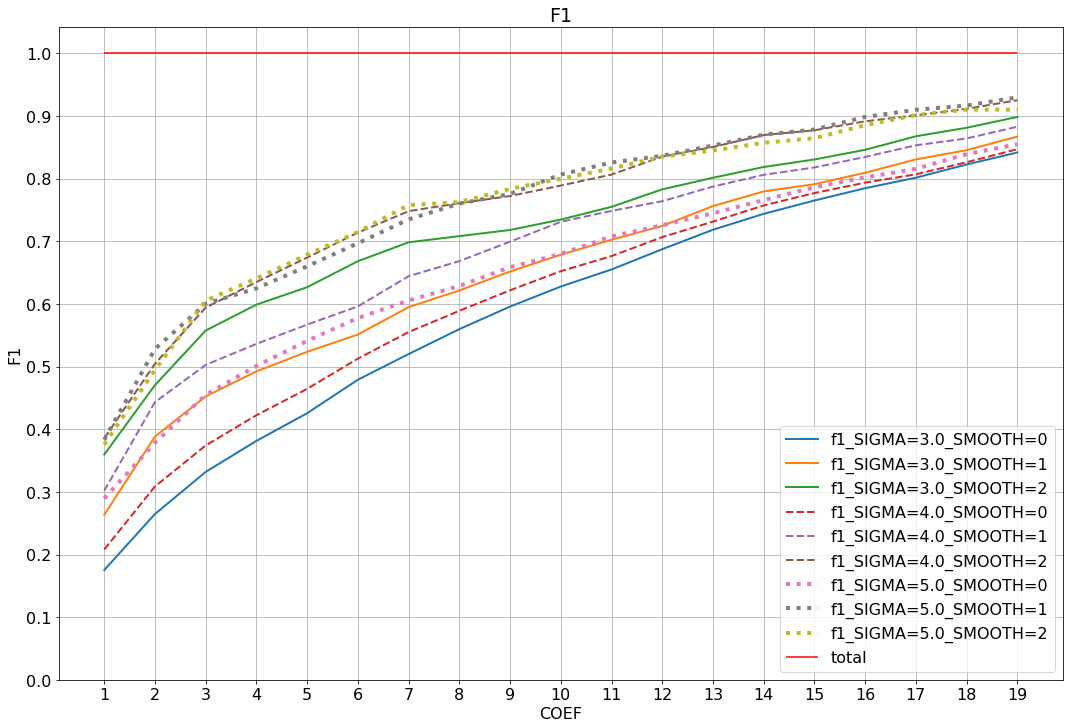

In [9]:
%matplotlib inline
font = {'size': 16}
plt.rc('font', **font)
coefs = metrics['COEFS']
fig = plt.figure(figsize=(18, 12))
for SIGMA in [3.0, 4.0, 5.0]:
    for SMOOTH in [0, 1, 2]:
        if SIGMA == 3.0:
            linestyle = '-'
            linewidth = 2
        if SIGMA == 4.0:
            linestyle = '--'
            linewidth = 2
        if SIGMA == 5.0:
            linestyle = ':'
            linewidth = 4
        f1 = metrics[str(SIGMA)][str(SMOOTH)]['f1']
        plt.plot(
            coefs, f1, linestyle=linestyle, linewidth=linewidth,
            label=f'f1_SIGMA={SIGMA}_SMOOTH={SMOOTH}'
        )
        
plt.hlines(1, min(coefs), max(coefs), color='r', label='total')
plt.grid()

plt.xticks(coefs)
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xlabel('COEF')
plt.ylabel('F1')
plt.legend()
plt.title(f'F1')
plt.savefig(f'F1.jpg')

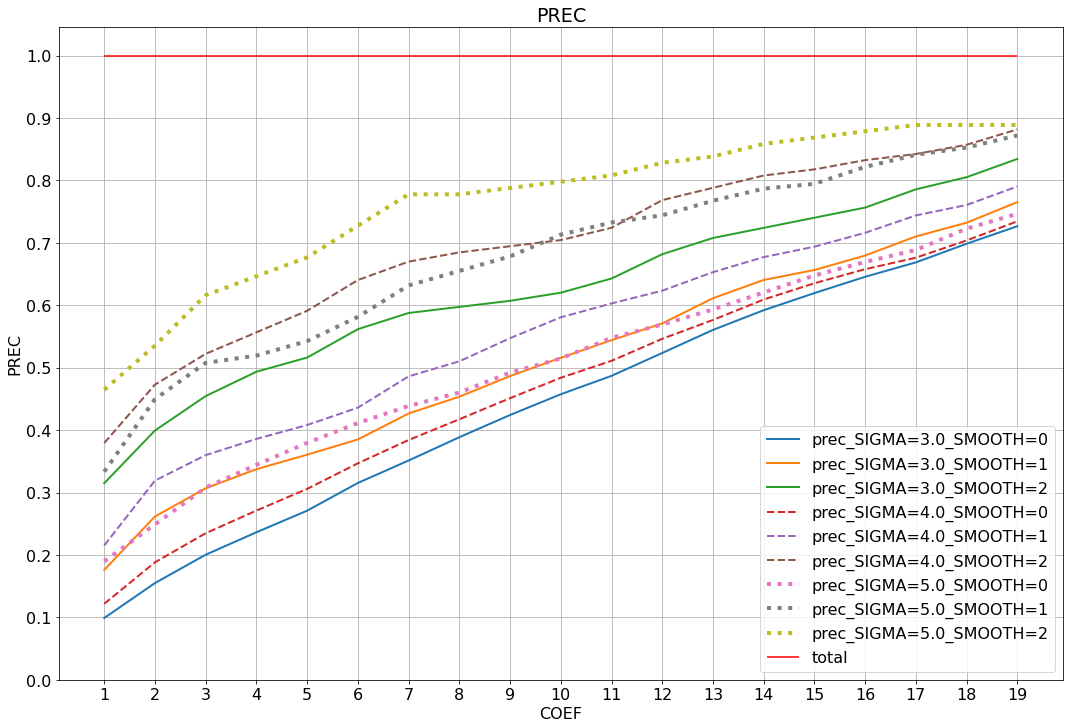

In [10]:
%matplotlib inline
font = {'size': 16}
plt.rc('font', **font)
coefs = metrics['COEFS']
fig = plt.figure(figsize=(18, 12))
for SIGMA in [3.0, 4.0, 5.0]:
    for SMOOTH in [0, 1, 2]:
        if SIGMA == 3.0:
            linestyle = '-'
            linewidth = 2
        if SIGMA == 4.0:
            linestyle = '--'
            linewidth = 2
        if SIGMA == 5.0:
            linestyle = ':'
            linewidth = 4
        f1 = metrics[str(SIGMA)][str(SMOOTH)]['prec']
        plt.plot(
            coefs, f1, linestyle=linestyle, linewidth=linewidth,
            label=f'prec_SIGMA={SIGMA}_SMOOTH={SMOOTH}'
        )
        
plt.hlines(1, min(coefs), max(coefs), color='r', label='total')
plt.grid()

plt.xticks(coefs)
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xlabel('COEF')
plt.ylabel('PREC')
plt.legend()
plt.title(f'PREC')
plt.savefig(f'PREC.jpg')

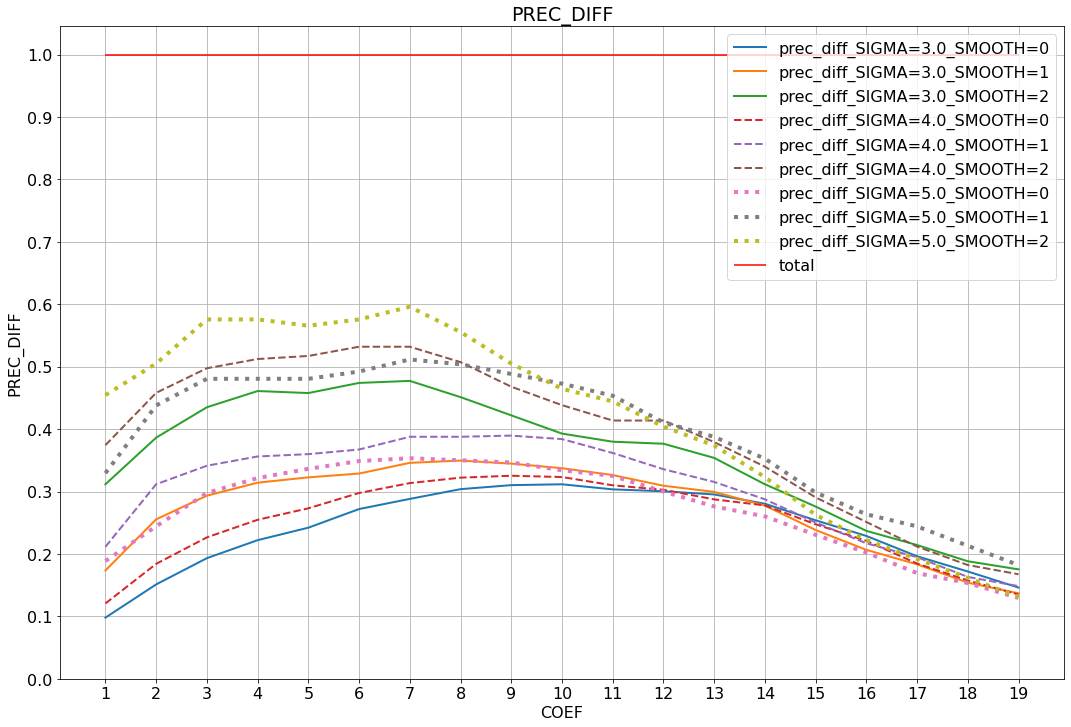

In [11]:
%matplotlib inline
font = {'size': 16}
plt.rc('font', **font)
coefs = metrics['COEFS']
fig = plt.figure(figsize=(18, 12))
for SIGMA in [3.0, 4.0, 5.0]:
    for SMOOTH in [0, 1, 2]:
        if SIGMA == 3.0:
            linestyle = '-'
            linewidth = 2
        if SIGMA == 4.0:
            linestyle = '--'
            linewidth = 2
        if SIGMA == 5.0:
            linestyle = ':'
            linewidth = 4
        prec_diff = metrics[str(SIGMA)][str(SMOOTH)]['prec_diff'] 
        plt.plot(
            coefs, prec_diff, linestyle=linestyle, linewidth=linewidth,
            label=f'prec_diff_SIGMA={SIGMA}_SMOOTH={SMOOTH}'
        )
        
plt.hlines(1, min(coefs), max(coefs), color='r', label='total')
plt.grid()

plt.xticks(coefs)
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xlabel('COEF')
plt.ylabel('PREC_DIFF')
plt.legend()
plt.title(f'PREC_DIFF')
plt.savefig(f'PREC_DIFF.jpg')

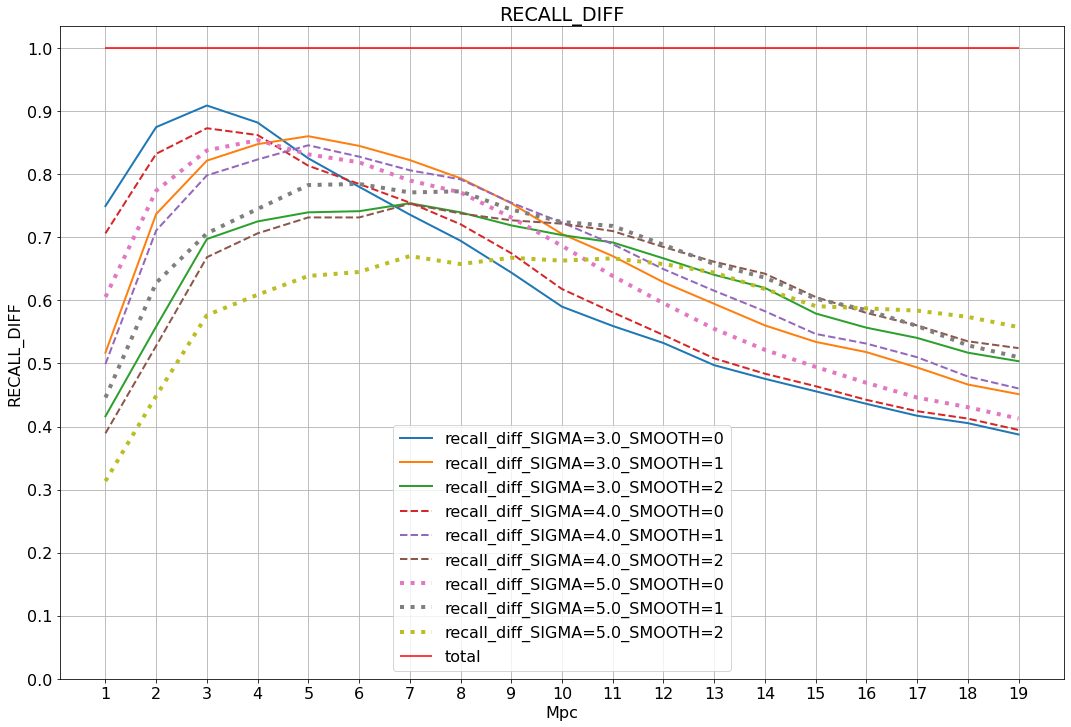

In [28]:
%matplotlib inline
font = {'size': 16}
plt.rc('font', **font)
coefs = metrics['COEFS']
fig = plt.figure(figsize=(18, 12))
for SIGMA in [3.0, 4.0, 5.0]:
    for SMOOTH in [0, 1, 2]:
        if SIGMA == 3.0:
            linestyle = '-'
            linewidth = 2
        if SIGMA == 4.0:
            linestyle = '--'
            linewidth = 2
        if SIGMA == 5.0:
            linestyle = ':'
            linewidth = 4
        prec_diff = metrics[str(SIGMA)][str(SMOOTH)]['recall_diff'] 
        plt.plot(
            coefs, prec_diff, linestyle=linestyle, linewidth=linewidth,
            label=f'recall_diff_SIGMA={SIGMA}_SMOOTH={SMOOTH}'
        )
        
plt.hlines(1, min(coefs), max(coefs), color='r', label='total')
plt.grid()

plt.xticks(coefs)
plt.yticks(np.arange(0.0, 1.1, 0.1))
# plt.xlabel('COEF')
plt.xlabel('Mpc')
plt.ylabel('RECALL_DIFF')
plt.legend()
plt.title(f'RECALL_DIFF')
plt.savefig(f'RECALL_DIFF.jpg')

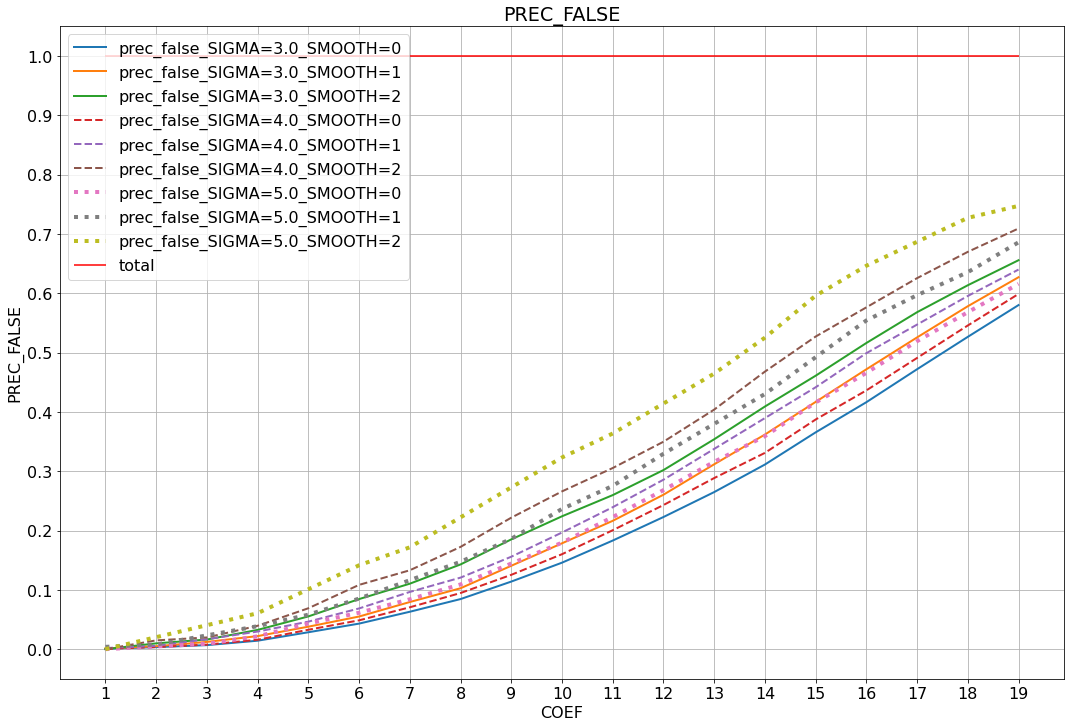

In [14]:
%matplotlib inline
font = {'size': 16}
plt.rc('font', **font)
coefs = metrics['COEFS']
fig = plt.figure(figsize=(18, 12))
for SIGMA in [3.0, 4.0, 5.0]:
    for SMOOTH in [0, 1, 2]:
        if SIGMA == 3.0:
            linestyle = '-'
            linewidth = 2
        if SIGMA == 4.0:
            linestyle = '--'
            linewidth = 2
        if SIGMA == 5.0:
            linestyle = ':'
            linewidth = 4
        prec_false = metrics[str(SIGMA)][str(SMOOTH)]['prec_false'] 
        plt.plot(
            coefs, prec_false, linestyle=linestyle, linewidth=linewidth,
            label=f'prec_false_SIGMA={SIGMA}_SMOOTH={SMOOTH}'
        )
        
plt.hlines(1, min(coefs), max(coefs), color='r', label='total')
plt.grid()

plt.xticks(coefs)
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xlabel('COEF')
plt.ylabel('PREC_FALSE')
plt.legend()
plt.title(f'PREC_FALSE')
plt.savefig(f'PREC_FALSE.jpg')

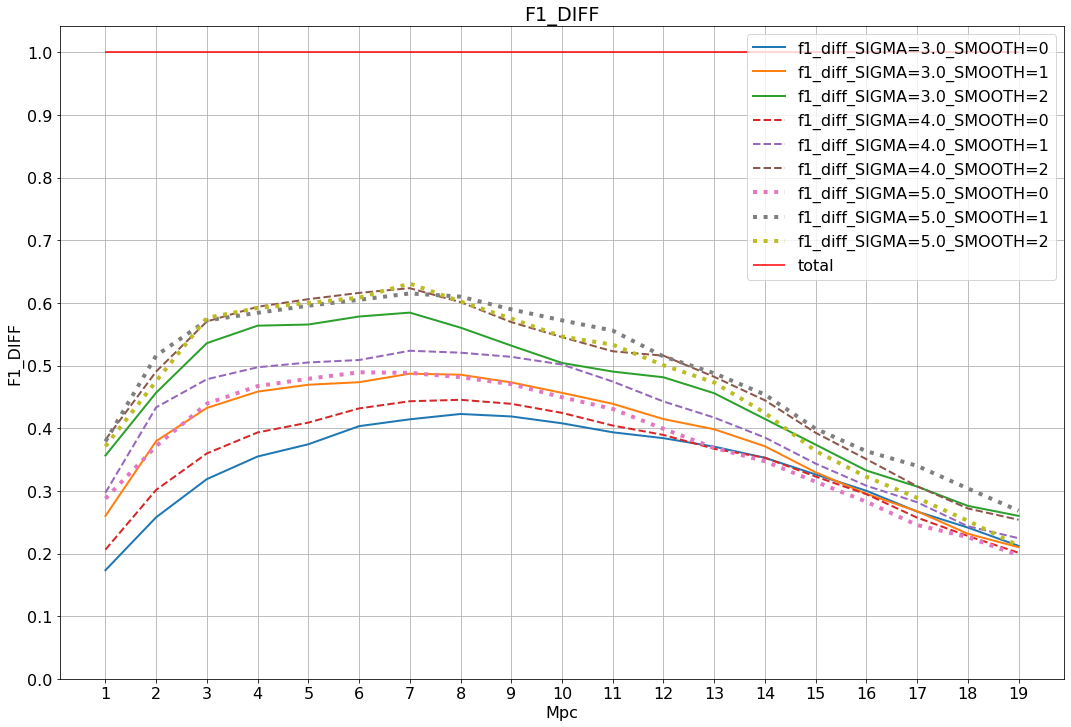

In [29]:
%matplotlib inline
font = {'size': 16}
plt.rc('font', **font)
coefs = metrics['COEFS']
fig = plt.figure(figsize=(18, 12))
for SIGMA in [3.0, 4.0, 5.0]:
    for SMOOTH in [0, 1, 2]:
        if SIGMA == 3.0:
            linestyle = '-'
            linewidth = 2
        if SIGMA == 4.0:
            linestyle = '--'
            linewidth = 2
        if SIGMA == 5.0:
            linestyle = ':'
            linewidth = 4
        f1_diff = metrics[str(SIGMA)][str(SMOOTH)]['f1_diff']
        plt.plot(
            coefs, f1_diff, linestyle=linestyle, linewidth=linewidth,
            label=f'f1_diff_SIGMA={SIGMA}_SMOOTH={SMOOTH}'
        )
        
plt.hlines(1, min(coefs), max(coefs), color='r', label='total')
plt.grid()

plt.xticks(coefs)
plt.yticks(np.arange(0.0, 1.1, 0.1))
# plt.xlabel('COEF')
plt.xlabel('Mpc')
plt.ylabel('F1_DIFF')
plt.legend()
plt.title(f'F1_DIFF')
plt.savefig(f'F1_DIFF.jpg')

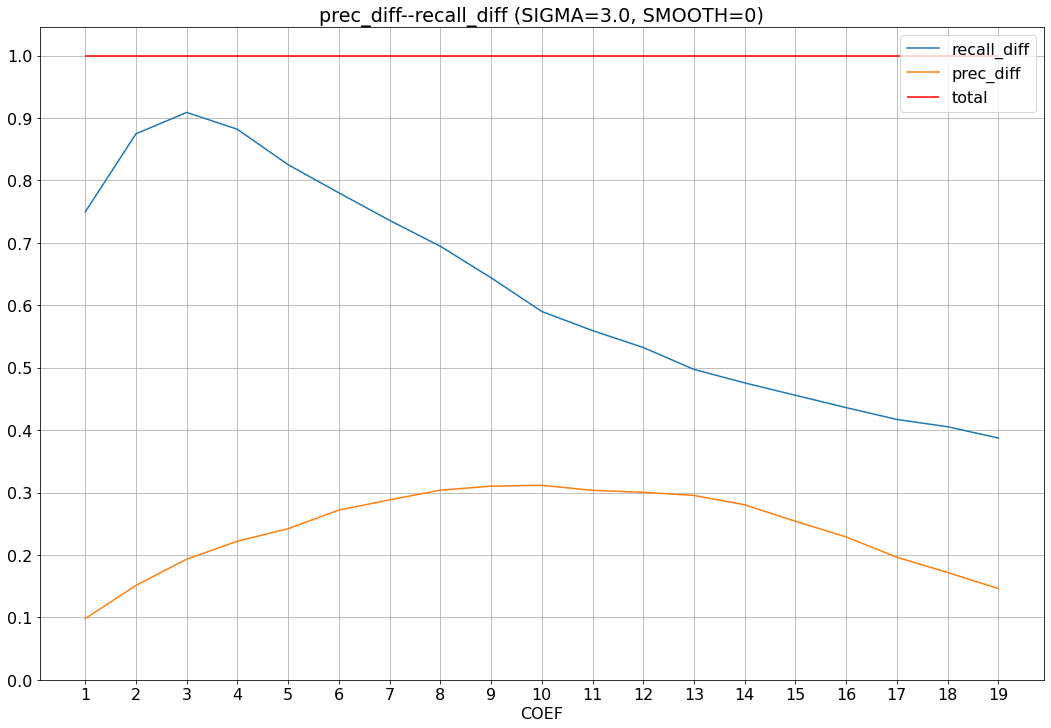

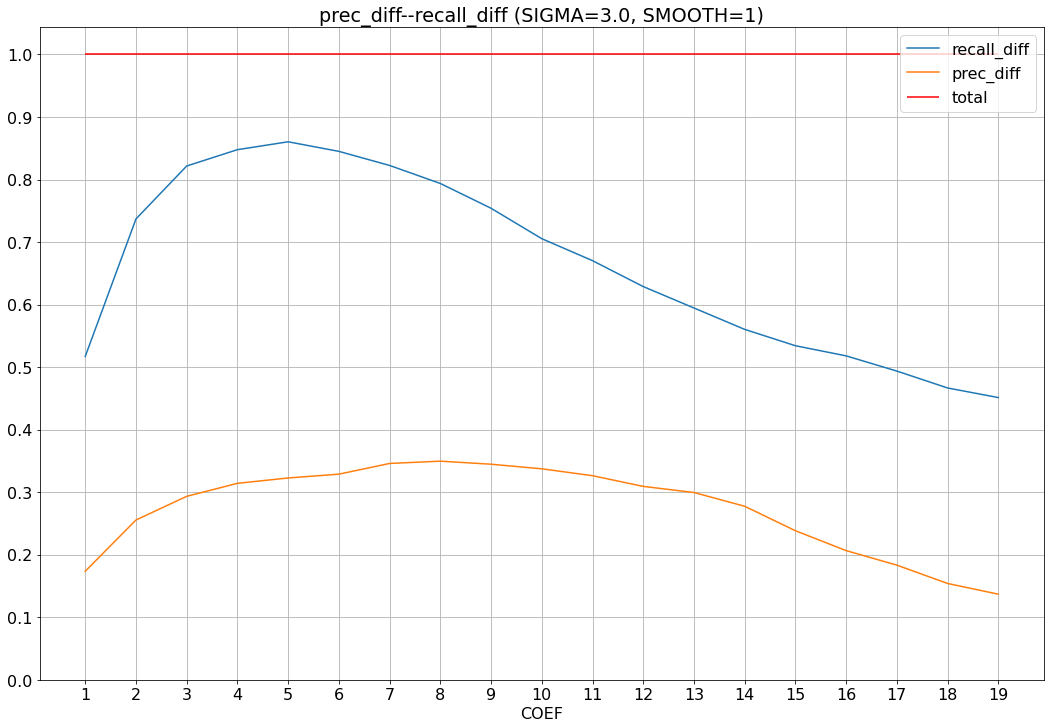

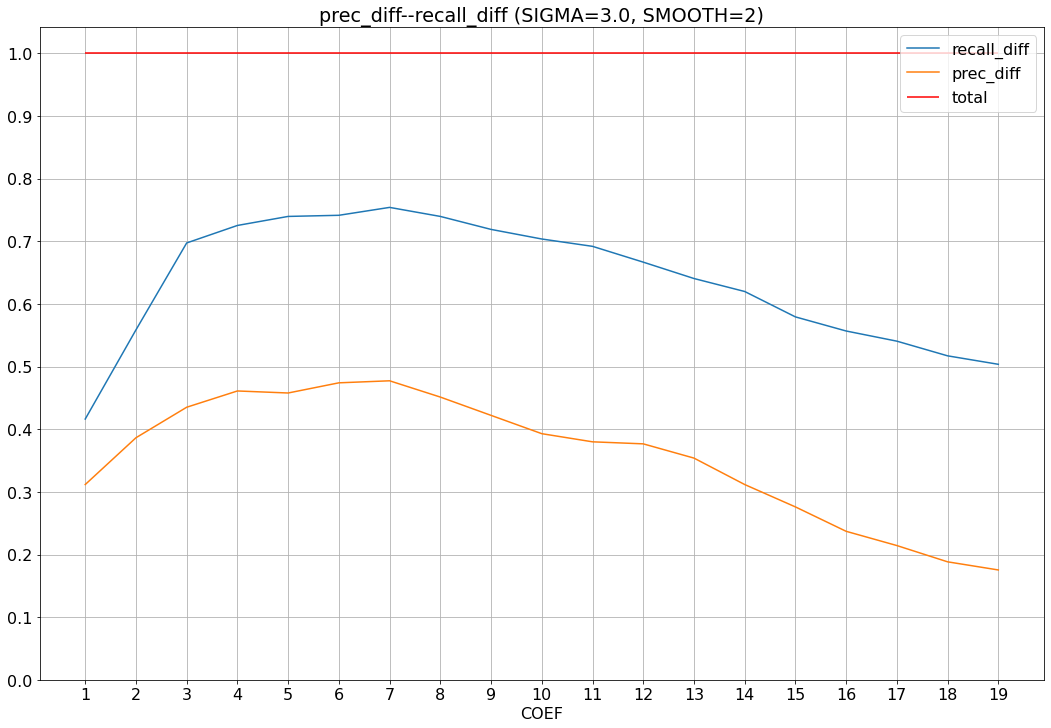

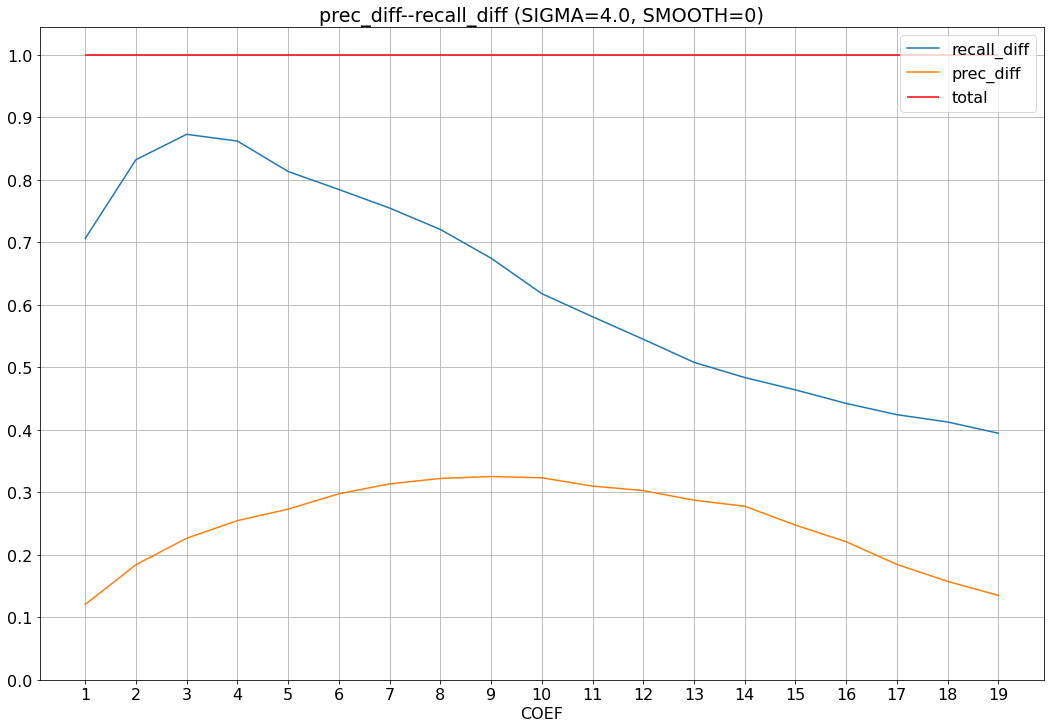

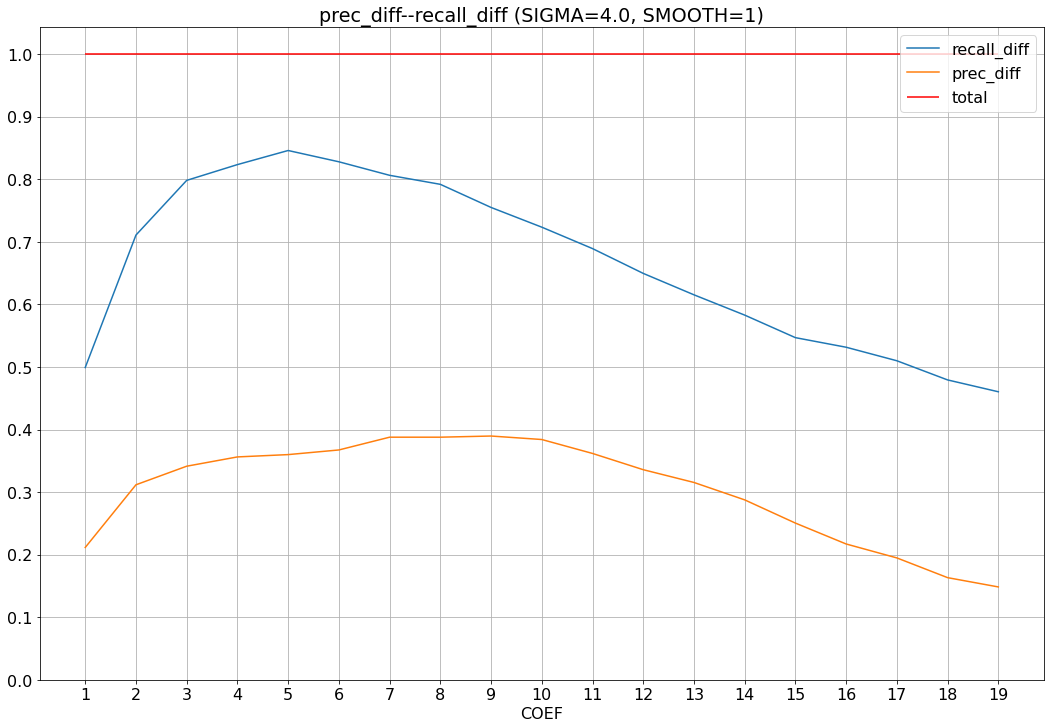

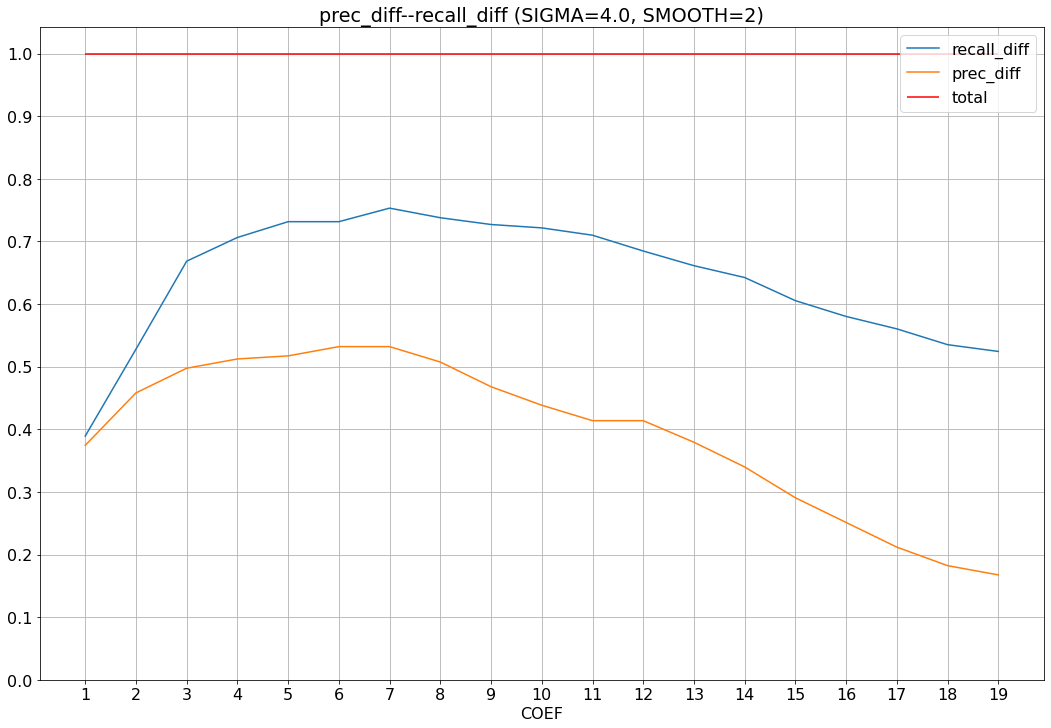

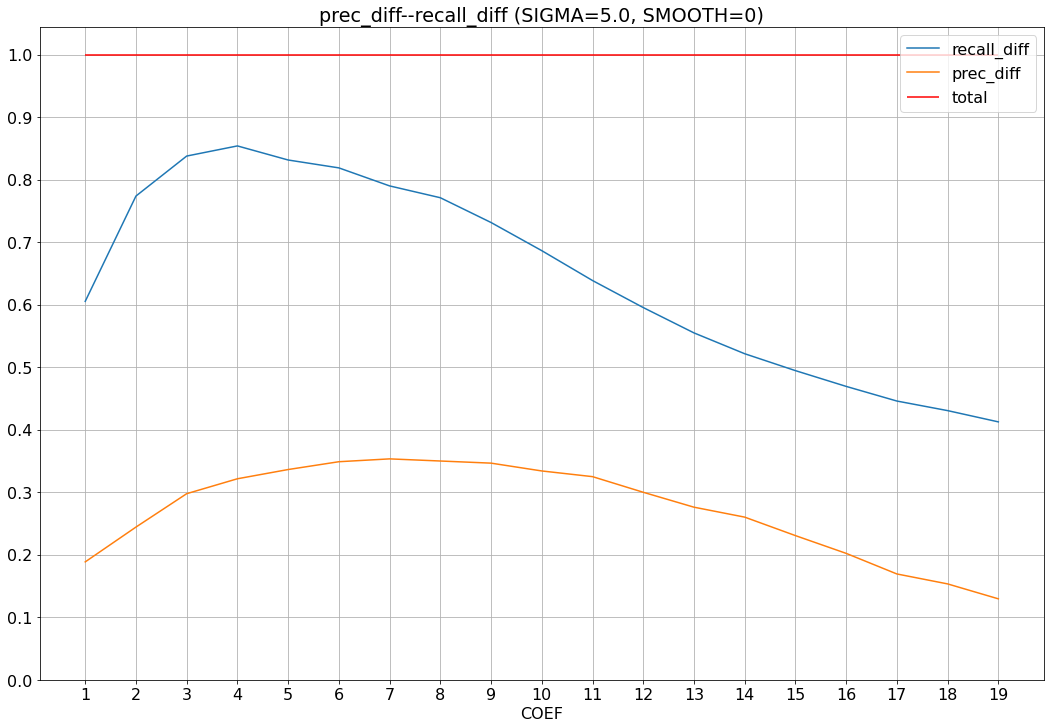

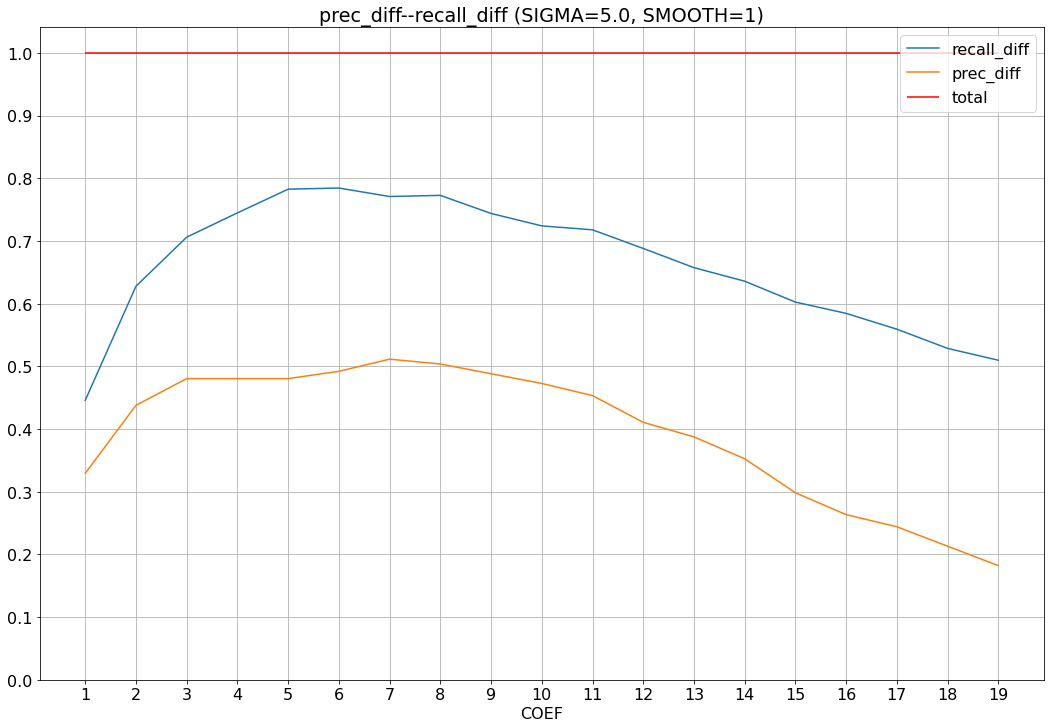

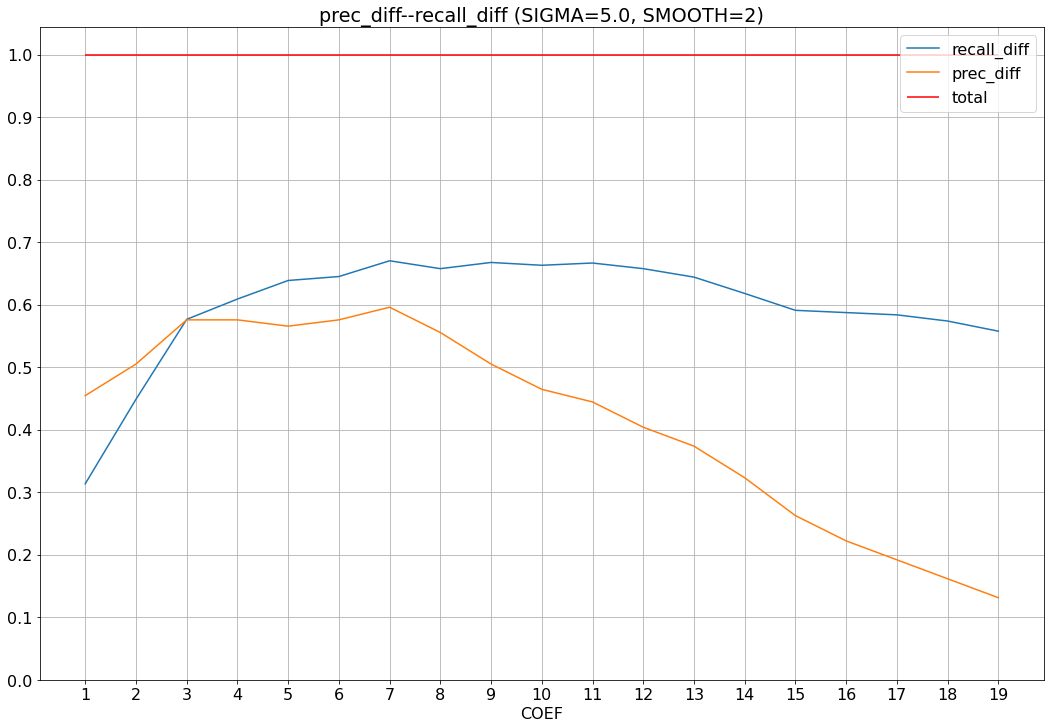

In [16]:
%matplotlib inline
for SIGMA in [3.0, 4.0, 5.0]:
    for SMOOTH in [0, 1, 2]:
        coefs = metrics['COEFS']
        recall_diff = metrics[str(SIGMA)][str(SMOOTH)]['recall_diff']
        prec_diff = metrics[str(SIGMA)][str(SMOOTH)]['prec_diff']

        font = {'size': 16}
        plt.rc('font', **font)
        fig = plt.figure(figsize=(18, 12))

        plt.plot(coefs, recall_diff, label='recall_diff')
        plt.plot(coefs, prec_diff, label='prec_diff')
        plt.hlines(1.0, min(coefs), max(coefs), color='r', label='total')
        plt.grid()

        plt.xticks(coefs)
        plt.yticks(np.arange(0.0, 1.1, 0.1))
        plt.xlabel('COEF')
#         plt.ylabel('Число кластеров')
        plt.legend()
        plt.title(f'prec_diff--recall_diff (SIGMA={SIGMA}, SMOOTH={SMOOTH})')
        plt.savefig(f'prec_diff--recall_diff (SIGMA={SIGMA}, SMOOTH={SMOOTH}).jpg')

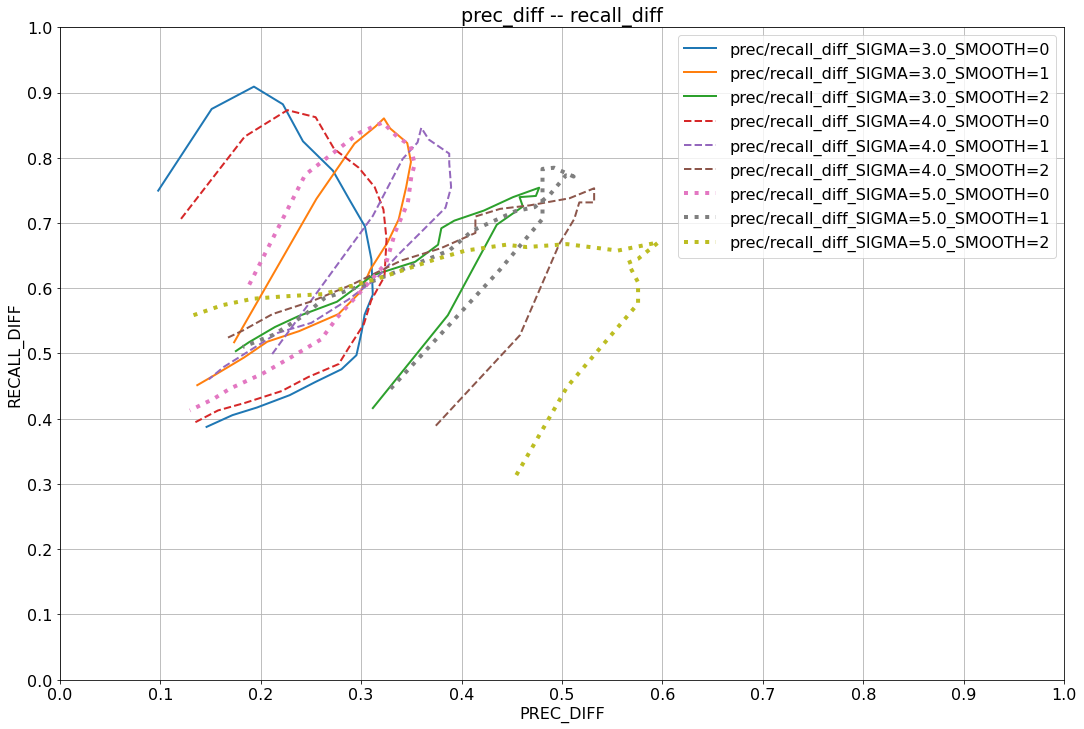

In [17]:
%matplotlib inline
font = {'size': 16}
plt.rc('font', **font)
coefs = metrics['COEFS']
fig = plt.figure(figsize=(18, 12))
for SIGMA in [3.0, 4.0, 5.0]:
    for SMOOTH in [0, 1, 2]:
        if SIGMA == 3.0:
            linestyle = '-'
            linewidth = 2
        if SIGMA == 4.0:
            linestyle = '--'
            linewidth = 2
        if SIGMA == 5.0:
            linestyle = ':'
            linewidth = 4
        recall_diff = metrics[str(SIGMA)][str(SMOOTH)]['recall_diff']
        prec_diff = metrics[str(SIGMA)][str(SMOOTH)]['prec_diff']
        plt.plot(
            prec_diff, recall_diff, linestyle=linestyle, linewidth=linewidth,
            label=f'prec/recall_diff_SIGMA={SIGMA}_SMOOTH={SMOOTH}'
        )
        
# plt.hlines(1, min(coefs), max(coefs), color='r', label='total')
plt.grid()

plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xlabel('PREC_DIFF')
plt.ylabel('RECALL_DIFF')
plt.legend()
plt.title(f'prec_diff -- recall_diff')
plt.savefig(f'prec_diff--recall_diff.jpg')